**Exercise 5.3** 

The goal of this exercise is to implement a Turing machine.
1. Read about Turing machines at http://thinkcomplex.com/tm.
2. Write a class called Turing that implements a Turing machine. For the
action table, use the rules for a 3-state busy beaver.

3. Write a class named TuringViewer that generates an image that represents the state of the tape and the position and state of the head. For one example of what that might look like, see http://thinkcomplex.com/turing.

In [1]:
import numpy as np

In [2]:
n = 15 # tam de la matriz (cinta)
class Turing:
# https://www.matesfacil.com/automatas-lenguajes/Maquina-Turing.html

    def __init__(self, Q, q0, F):
        """ 
        Q: conjunto de estados
        q0: estado inicial de la maquina
        F: estado final de la maquina
        """
        self.Q = Q
        self.q0 = q0
        self.F = F
        self.cinta = np.zeros((n, n), dtype=np.uint8)
        self.cabeza = n//2                             # posicion en el centro de la cinta
        self.sig = 1

    def func_delta(self, q, simbolo): 
        #func de transicion -> δ(q,X) = (p,Y,{L, R})

        # simbolo 0 y estado A
        if q == "A" and simbolo == 0:
            return "B", 1, "R"
            
        # simbolo 0 y estado B
        if q == "B" and simbolo == 0:
            return "A", 1, "L"

        # simbolo 0 y estado C
        if q == "C" and simbolo == 0:
            return "B", 1, "L"

        # simbolo 1 y estado A
        if q == "A" and simbolo == 1:
            return "C", 1, "L"        

        # simbolo 1 y estado B
        if q == "B" and simbolo == 1:
            return "B", 1, "R"

        # simbolo 1 y estado B
        if q == "C" and simbolo == 1:
            return "H", 1, "R"


    """
    ejecuta la maquina, el ciclo se ejecuta mientras q0 no es F, 
    lee el simbolo sobre el cual esta el cabezal y estado de la maquina,
    """
    def corre_maquina(self):
        acciones = []

        while self.q0 != self.F:
            self.cinta[self.sig] = self.cinta[self.sig - 1]
            simbolo_act = self.cinta[self.sig - 1, self.cabeza]           # simbolo actual
            actual = self.q0                                              # estado actual
            
            # actualizacion de q0, cinta y direccion del cabezal
            self.q0, self.cinta[self.sig, self.cabeza], direc = self.func_delta(
                self.q0, simbolo_act)
            
            # se guardan las acciones que realiza la maquina en cada iteracion
            acciones.append([self.q0, self.cinta[self.sig, self.cabeza], direc])

            if direc == "R":
                self.cabeza += 1
            if direc == "L":
                self.cabeza -= 1
            self.sig += 1
            
        print(self.cinta)
        print("Acciones en la maquina: ")
        print(np.array(acciones))
        


In [3]:
# 
Q, q0, F = ["A", "B", "C", "H"], "A", "H"
maquina = Turing(Q, q0, F)

# muestra las acciones realizadas por la maquina en la cinta(matriz)
maquina.corre_maquina()


[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
Acciones en la maquina: 
[['B' '1' 'R']
 ['A' '1' 'L']
 ['C' '1' 'L']
 ['B' '1' 'L']
 ['A' '1' 'L']
 ['B' '1' 'R']
 ['B' '1' 'R']
 ['B' '1' 'R']
 ['B' '1' 'R']
 ['B' '1' 'R']
 ['A' '1' 'L']
 ['C' '1' 'L']
 ['H' '1' 'R']]


**Exercise 6.5**

If you generalize the Turing machine to two dimensions, or
add a read-write head to a 2-D CA, the result is a cellular automaton called a Turmite. It is named after a termite because of the way the read-write head moves, but spelled wrong as an homage to Alan Turing.

The most famous Turmite is Langton’s Ant, discovered by Chris Langton in 1986. See http://thinkcomplex.com/langton.

The ant is a read-write head with four states, which you can think of as facing north, south, east or west. The cells have two states, black and white.

The rules are simple. During each time step, the ant checks the color of the cell it is on. If black, the ant turns to the right, changes the cell to white, and moves forward one space. If the cell is white, the ant turns left, changes the cell to black, and moves forward.

Given a simple world, a simple set of rules, and only one moving part, you might expect to see simple behavior — but you should know better by now.Starting with all white cells, Langton’s ant moves in a seemingly random pattern for more than 10,000 steps before it enters a cycle with a period of 104 steps. After each cycle, the ant is translated diagonally, so it leaves a trail called the “highway”.

**Write an implementation of Langton’s Ant.**


In [4]:
from matplotlib import animation
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from IPython import display

In [5]:

class Langton():

    def __init__(self, malla):
        """
        malla: matriz(nxn) donde se mueve la hormiga
        """
        
        self.malla = malla
        self.a, self.b = self.malla.shape                           #dimension de la matriz
        self.fig, self.ax = plt.subplots(figsize=(8,8))
        self.imagen = self.ax.imshow(self.malla, cmap='binary', alpha=1, vmin=0, vmax=1)
        self.direc = "C"
        self.pos_x, self.pos_y = 0, 0

    def direcciones(self, valor, x, y, R):
        # condicion inicial
        if(R == "C"):
            if valor == 0:
                return  1, x-1, y, "N"
        ######################

        if(R == "N"):
            if valor == 0:
                return 1, x, y+1, "E"
            if valor == 1:
                return 0, x, y-1, "O"

        if(R == "S"):
            if valor == 0:
                return 1, x, y-1, "O"
            if valor == 1:
                return 0, x, y+1, "E" 

        if(R == "E"):
            if valor == 0:
                return 1, x+1, y, "S"
            if valor ==1:
                return 0, x-1, y, "N"

        if(R == "O"):
            if valor == 1:
                return 0, x+1, y, "S"
            if valor == 0:
                return 1, x-1, y, "N"

    def un_paso(self):
        a, b = self.a//2 , self.b//2 # posicion inicial de la hormiga
        if self.direc == "C":
            self.malla[a, b], self.pos_x, self.pos_y,
            self.direc = self.direcciones(self.malla[a,b], a, b, self.direc)

        self.malla[self.pos_x, self.pos_y],
        self.pos_x,
        self.pos_y,
        self.direc = self.direcciones(self.malla[self.pos_x, self.pos_y],
                                      self.pos_x,self.pos_y,self.direc)
        
    def corre(self, i):
        if i < 0:
            return 
        self.un_paso()
        self.imagen.set_array(self.malla)

    def animacion(self):
        anim = animation.FuncAnimation(self.fig, self.corre, frames = 2000, 
                                       interval = 1000/24)
        return display.display_html(anim.to_jshtml(), raw=True)



In [6]:
malla = np.zeros((300, 300), dtype=np.uint8) # malla inicial de 300x300

Ant = Langton(malla)


In [7]:
# en colab no despliegua a más de 3000 frames, se realizo con 2000 frames,

Ant.animacion()

**Exercise 7.2**

In 1990 Bak, Chen and Tang proposed a cellular automaton
that is an abstract model of a forest fire. Each cell is in one of three states:
empty, occupied by a tree, or on fire.

The rules of the CA are:
1. An empty cell becomes occupied with probability p.
2. A cell with a tree burns if any of its neighbors is on fire.
3. A cell with a tree spontaneously burns, with probability f, even if none
of its neighbors is on fire.
4. A cell with a burning tree becomes an empty cell in the next time step.

Write a program that implements this model. You might want to inherit from Cell2D. Typical values for the parameters are p = 0.01 and f = 0.001, but you might want to experiment with other values.

Starting from a random initial condition, run the model until it reaches a steady state where the number of trees no longer increases or decreases consistently.

In steady state, is the geometry of the forest fractal? What is its fractal dimension?

In [8]:

import matplotlib.pyplot as plt
from scipy import signal
import numpy as np
from matplotlib import animation
from IPython import display

In [9]:
class Fire:
    def __init__(self,p, f, n, w):
        """
        p: probabilidad de que una celda sea ocupada por un arbol
        f: probabilidad de que un arbol se encienda espontaneamente
        n: tamaño de la matriz
        w: matriz w
        """
        self.w = w
        self.p = p
        self.f = f
        self.A = (np.random.random(size = (n, n)) <= self.p).astype(np.int_)
        self.fig, self.ax = plt.subplots(figsize = (8, 8))
        self.imagen = self.ax.imshow(self.A, cmap='Reds', alpha=1, vmin=0, vmax=5)
        
    def un_paso(self):
        valor = np.random.random(self.A.shape)
        nuevo_arbol = (self.A == 0) & (valor < self.p)
        c = signal.correlate2d(self.A, self.w, mode='same', boundary='wrap')

        fuego = (self.A == 1) & ((c>4) | (valor<self.f))

        self.A[self.A == 5] = 0
        self.A[nuevo_arbol] = 1
        self.A[fuego] = 5

    def corre(self, i):
        if i < 0:
            return 
        self.un_paso()
        self.imagen.set_array(self.A)

    def cuenta(self):         # cuenta el numero de arboles en el bosque (matriz de tamaño n)
        a = np.array(self.A)
        return np.sum(a == 1)


    def animacion(self):
        anim = animation.FuncAnimation(self.fig, self.corre, frames = 1000, interval= 1000/24)
        return display.display_html(anim.to_jshtml(), raw=True)


In [10]:
w = np.array([[0, 1, 0],
              [1, 0, 1],
              [0, 1, 0]
              ])

p, f = 0.01, 0.001                                      # parametros de problabilidad (habituales)
n = 350                                                 # tamaño de la matriz inicial

#A = (np.random.random(size = (n, n)) <= p).astype(np.int_)

In [11]:
bosque = Fire(p, f, n, w)

In [12]:
bosque.animacion()

In [13]:
"""
ejecuta la simulacion, crea matrices de tamaño "s" hasta "t"
regresa el conteo de arboles
"""
def genera_simulacion(s, t):
    X = []
    n = [i for i in range(s, t)]

    for j in n:
        n = j
        bosque = Fire(p, f, n, w)      # ejecuta 5 veces un bosque de tamaño n y ejecuta un paso en cada ciclo
        for i in range(5):
            bosque.un_paso()
            #if bosque.cuenta() != 0:
            X.append(bosque.cuenta())  # cuenta los arboles 
    return X
    


In [14]:
w = np.array([[0, 1, 0],
              [1, 0, 1],
              [0, 1, 0]
              ])
p, f = 0.01, 0.001
s, t = 5, 128   # para crear matrices de tamaño 5, 6, 7,..., 128

X = genera_simulacion(s, t)


In [0]:
#print(0 in X)   
#print(len(X), X)

In [0]:

"""
num = []

for i in range(500):
    bosque.un_paso()
    num.append(bosque.cuenta())
    
plt.plot(num)"""


'\nnum = []\n\nfor i in range(500):\n    bosque.un_paso()\n    num.append(bosque.cuenta())\n    \nplt.plot(num)'

In [15]:
"""
Al ejecutar la simulacion algunos bosques(matrices) No tienen arboles, por lo que no puede haber un incendio, 
cuando es 0 los remplazo por 1 para que haya al menos un arbol
"""
for n, i in enumerate(X):
    if i == 0:
        X[n] = 1


NameError: name 'X' is not defined

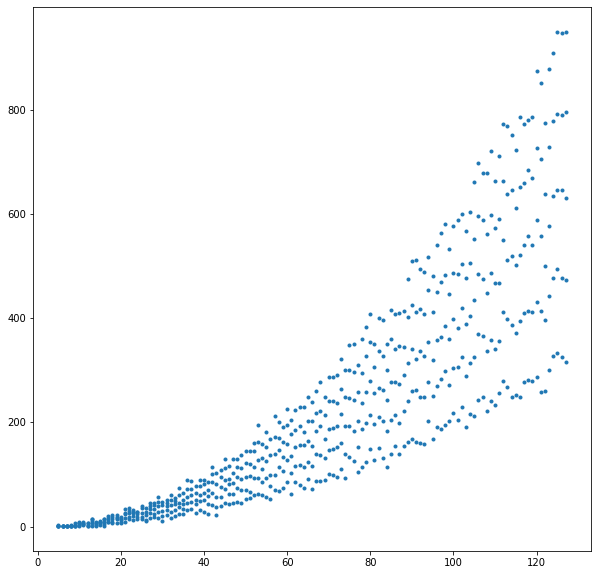

In [9]:
# viasualizacion de los datos

fig, ax = plt.subplots(figsize = (10,10))
ax.plot([i for i in range(s, t) for j in range(5)], X, ".")

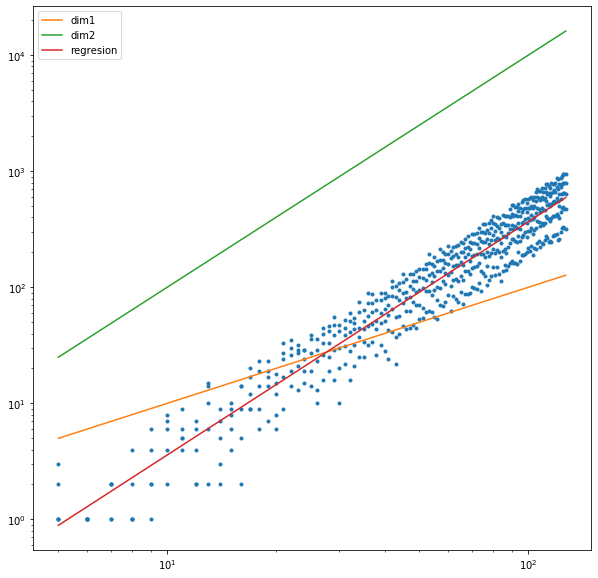

In [10]:
# graficando las dimensiones fractales, 

fig, ax = plt.subplots(figsize = (10,10))
ax.plot([i for i in range(s, t) for j in range(0, s)], X,".")

x = np.array([i for i in range(s, t) for j in range(0, s)])
#x = np.array(x)

ax.plot(x, x, label='dim1')
ax.plot(x, x**2, label='dim2')

polinomio = np.polyfit(np.log(x), np.log(X), deg = 1)
regresion = np.exp(np.polyval(polinomio, np.log(x)))
ax.plot(x, regresion, label="regresion")

ax.set_xscale("log")
ax.set_yscale("log")
ax.legend()

In [11]:
# la dimension varia en las simulaciones, se acerca a 2 por la izq y por la der, en algunos casos es 2
# no es claro si es o no es un fractal por estas variaciones

print("la dimension del fractal es: ", polinomio[0])


la dimension del fractal es:  2.0101189175640553
